<a href="https://colab.research.google.com/github/sathamhussain7/ML-algorithms/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple Linear Regression**

import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**load the data**

In [ ]:
df=pd.read_csv('/content/petrol_consumption (1).csv')

In [ ]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


**clean the data**

In [ ]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
df.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [ ]:
df.shape

(48, 5)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


**Outlier detection**

In [ ]:
feature=['Petrol_tax',	'Average_income',	'Paved_Highways',	'Population_Driver_licence(%)',	'Petrol_Consumption']
for i in feature:
 iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
 upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
 lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)

 print('feature:',i)
 print('iqr :',iqr)
 print('upper_threshold : ',upper_threshold)
 print('lower_threshold :',lower_threshold)
 
 if upper_threshold < df[i].max():
  print('No outlier in upper_threshold ')
 else:
  print('outlier in upper_threshold')
 if lower_threshold> df[i].min():
   print('No outlier in lower_threshold ')
 else:
  print('outlier in lower_threshold')
 print()

feature: Petrol_tax
iqr : 1.125
upper_threshold :  9.8125
lower_threshold : 5.3125
No outlier in upper_threshold 
No outlier in lower_threshold 

feature: Average_income
iqr : 839.75
upper_threshold :  5838.375
lower_threshold : 2479.375
outlier in upper_threshold
outlier in lower_threshold

feature: Paved_Highways
iqr : 4045.75
upper_threshold :  13224.625
lower_threshold : -2958.375
No outlier in upper_threshold 
outlier in lower_threshold

feature: Population_Driver_licence(%)
iqr : 0.06549999999999989
upper_threshold :  0.6934999999999998
lower_threshold : 0.4315000000000002
No outlier in upper_threshold 
outlier in lower_threshold

feature: Petrol_Consumption
iqr : 123.25
upper_threshold :  817.625
lower_threshold : 324.625
No outlier in upper_threshold 
outlier in lower_threshold



**EDA**

**Plotting**

<function matplotlib.pyplot.show(close=None, block=None)>

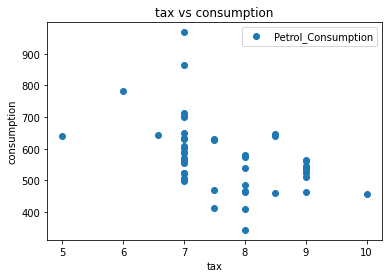

In [ ]:
df.plot(x='Petrol_tax',y='Petrol_Consumption',style='o') # style='o' scatter plot
plt.title('tax vs consumption')
plt.xlabel('tax')
plt.ylabel('consumption')
plt.show

not able to interpertate from plot
then group by countries compute average and do plot
combine all country has same petrol tax

In [ ]:
df.groupby('Petrol_tax')['Petrol_Consumption'].mean() #grouping countries have same petrol tax and get mean

Petrol_tax
5.00     640.000000
6.00     782.000000
6.58     644.000000
7.00     631.736842
7.50     536.000000
8.00     502.000000
8.50     582.666667
9.00     530.875000
10.00    457.000000
Name: Petrol_Consumption, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

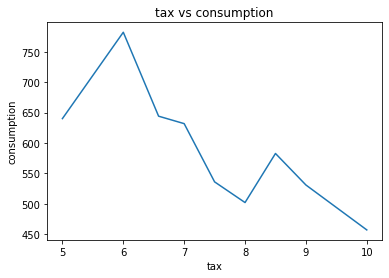

In [ ]:
df.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
plt.title('tax vs consumption')
plt.xlabel('tax')
plt.ylabel('consumption')
plt.show

there is a relation between tax and consumption. 
negative relationship


In [ ]:
df[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


indicates linear relationship 
no transformation required

<function matplotlib.pyplot.show(close=None, block=None)>

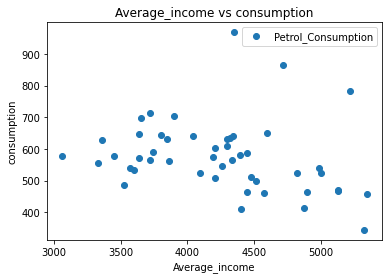

In [ ]:
df.plot(x='Average_income',y='Petrol_Consumption',style='o') # style='o' scatter plot
plt.title('Average_income vs consumption')
plt.xlabel('Average_income')
plt.ylabel('consumption')
plt.show

In [ ]:
df[['Average_income','Petrol_Consumption']].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


-0.2 to -1 shows negative linear reationship
low linear relationship

<function matplotlib.pyplot.show(close=None, block=None)>

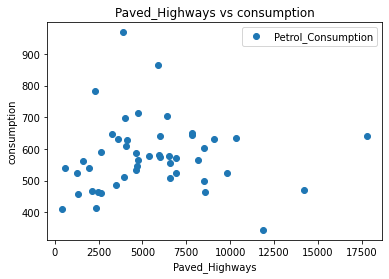

In [ ]:
df.plot(x='Paved_Highways',y='Petrol_Consumption',style='o') # style='o' scatter plot
plt.title('Paved_Highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('consumption')
plt.show

In [ ]:
df[['Paved_Highways','Petrol_Consumption']].corr()

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.019042
Petrol_Consumption,0.019042,1.000000


show no linear relationship. transformation required

,trans_paved_highways,Petrol_Consumption
trans_paved_highways,1.000000,-0.046976
Petrol_Consumption,-0.046976,1.000000


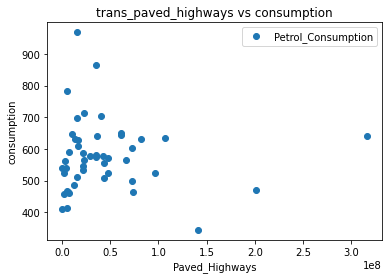

In [ ]:
df['trans_paved_highways']=np.square(df['Paved_Highways']) #x^2
df.plot(x='trans_paved_highways',y='Petrol_Consumption',style='o') # style='o' scatter plot
plt.title('trans_paved_highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('consumption')
plt.show
df[['trans_paved_highways','Petrol_Consumption']].corr()

,trans_paved_highways,Petrol_Consumption
trans_paved_highways,1.000000,-0.046703
Petrol_Consumption,-0.046703,1.000000


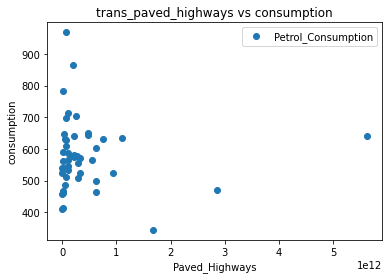

In [ ]:
df['trans_paved_highways']=np.power(df['Paved_Highways'],3) #x^3
df.plot(x='trans_paved_highways',y='Petrol_Consumption',style='o') # style='o' scatter plot
plt.title('trans_paved_highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('consumption')
plt.show
df[['trans_paved_highways','Petrol_Consumption']].corr()

,trans_paved_highways,Petrol_Consumption
trans_paved_highways,1.000000,0.086698
Petrol_Consumption,0.086698,1.000000


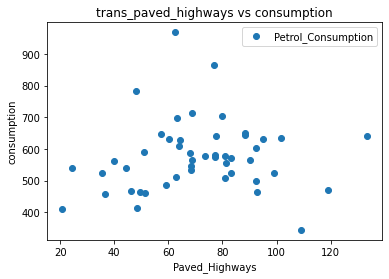

In [ ]:
df['trans_paved_highways']=np.power(df['Paved_Highways'],0.5) #square root
df.plot(x='trans_paved_highways',y='Petrol_Consumption',style='o') # style='o' scatter plot
plt.title('trans_paved_highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('consumption')
plt.show
df[['trans_paved_highways','Petrol_Consumption']].corr()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,trans_paved_highways,Petrol_Consumption
trans_paved_highways,NaN,0.0
Petrol_Consumption,0.0,1.0


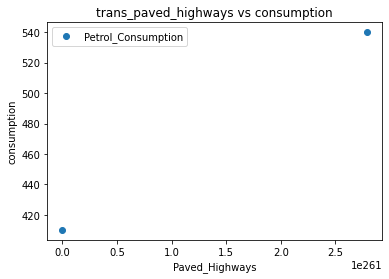

In [ ]:
df['trans_paved_highways']=np.exp(df['Paved_Highways']) #exponentioal e^x
df.plot(x='trans_paved_highways',y='Petrol_Consumption',style='o') # style='o' scatter plot
plt.title('trans_paved_highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('consumption')
plt.show
df[['trans_paved_highways','Petrol_Consumption']].corr()

,trans_paved_highways,Petrol_Consumption
trans_paved_highways,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


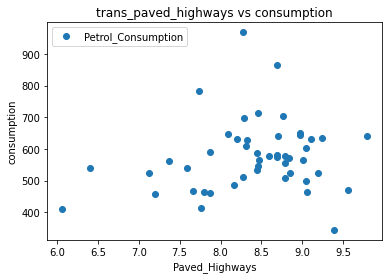

In [ ]:
df['trans_paved_highways']=np.log(df['Paved_Highways']) #log(x)
df.plot(x='trans_paved_highways',y='Petrol_Consumption',style='o') # style='o' scatter plot
plt.title('trans_paved_highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('consumption')
plt.show
df[['trans_paved_highways','Petrol_Consumption']].corr()

there is no linear relationship 
tried all transformation still not able to see good linear relationship
decided to drop the feature

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


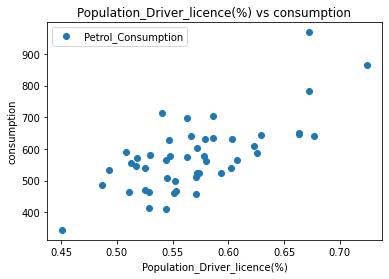

In [ ]:
df.plot(x='Population_Driver_licence(%)',y='Petrol_Consumption',style='o') # style='o' scatter plot
plt.title('Population_Driver_licence(%) vs consumption')
plt.xlabel('Population_Driver_licence(%)')
plt.ylabel('consumption')
plt.show
df[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

show strong linear relationship

**Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split
X=df[['Petrol_tax','Average_income','Population_Driver_licence(%)']].values
y=df['Petrol_Consumption'].values
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=7)

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

**Modelling**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

582.9210526315788

In [ ]:
regressor.coef_

array([-30.47629449, -43.01095908,  81.17581343])

In [ ]:
df_coef=pd.DataFrame(regressor.coef_,['Petrol_tax','Average_income','Population_Driver_licence(%)'],columns=['coefficient'])
df_coef

,coefficient
Petrol_tax,-30.476294
Average_income,-43.010959
Population_Driver_licence(%),81.175813


petrol_consumption=(-30*scaled_petrol_tax)+(-43*scaled_average_income)+(81*scaled_population_driver_license)

important feature= compare absolute value of coefficient

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([569.28180551, 620.82166907, 401.74253105, 680.77884877,
       669.50379583, 499.84550898, 546.81061132, 712.92580049,
       499.7570821 , 498.33080802])

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(y_test,y_pred)

0.4090793492518352

In [ ]:
regressor.score(X_test,y_test)

0.4090793492518352

In [ ]:
regressor.predict(scaler.transform(np.array([[9,400,0.545]])))

array([767.97065061])